<a href="https://colab.research.google.com/github/piyushpp07/DataScience/blob/main/pandas_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

series 
1d 
labeled


In [8]:
A=pd.Series([1,2,3,4],index=['a','b','c','d'])

In [11]:
type(A.index)

pandas.core.indexes.base.Index

In [16]:
A['a':'c']

a    1
b    2
c    3
dtype: int64

In [15]:
B=pd.Series([1,2,3,4])
print(B.index)

RangeIndex(start=0, stop=4, step=1)


implicit index iloc [start:end)
explicit loc [start:end]

In [17]:
C= pd.Series([1,2,3,4],index=[1,4,2,7]) # explicit

In [20]:
C.iloc[1:7]

4    2
2    3
7    4
dtype: int64

Creating From Dictionary

In [22]:
height = {'A':5.5,'B':5.7,'C':6.2}
heightd=pd.Series(height)
heightd


A    5.5
B    5.7
C    6.2
dtype: float64

In [25]:
weightd = {'A':5.5,'B':5.7,'C':6.2}
weight=pd.Series(weightd)
weight

A    5.5
B    5.7
C    6.2
dtype: float64

DataFrames

In [49]:
df=pd.DataFrame( [[1,2,3] , [4,5,6] , [7,8,9] ,[10,11,12] ] , index=['r1','r2','r3','r4'],columns=['c1','c2','c3'])
df

,c1,c2,c3
r1,1,2,3
r2,4,5,6
r3,7,8,9
r4,10,11,12


In [29]:
print(type(df.values))

<class 'numpy.ndarray'>


In [31]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [32]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [58]:
df=pd.DataFrame( { 'Height':height ,'Weight':weight} )

In [59]:
print(df.index)
print(df.columns)
print(df['Height']) #using loc and iloc we can access the rows
print(df.iloc[1])

Index(['A', 'B', 'C'], dtype='object')
Index(['Height', 'Weight'], dtype='object')
A    5.5
B    5.7
C    6.2
Name: Height, dtype: float64
Height    5.7
Weight    5.7
Name: B, dtype: float64


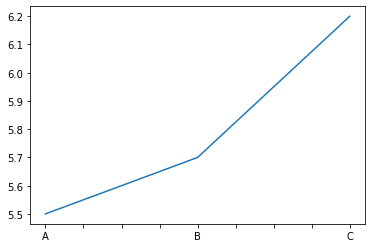

In [60]:
df['Height'].plot()


df[column]
df[[col1,col2,col3]]
df[[true,false,false]]
df[df['Height']>5.5]


In [78]:
df[[True,True,True]]

ValueError: ignored

Creating Column Operations


In [69]:
df['Height_CM']=df.Height*30.48
print(df)

   Height  Weight  Height_CM
A     5.5     5.5    167.640
B     5.7     5.7    173.736
C     6.2     6.2    188.976


inplace = True same dataframe gets updated




In [72]:
df.drop(columns=['Height_CM'],index=['A'],inplace=True)

In [73]:
df

,Height,Weight
B,5.7,5.7
C,6.2,6.2


In [76]:
df.info()
print(df.head)

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, B to C
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  2 non-null      float64
 1   Weight  2 non-null      float64
dtypes: float64(2)
memory usage: 128.0+ bytes
<bound method NDFrame.head of    Height  Weight
B     5.7     5.7
C     6.2     6.2>


In [77]:
df.describe()

,Height,Weight
count,2.000000,2.000000
mean,5.950000,5.950000
std,0.353553,0.353553
min,5.700000,5.700000
25%,5.825000,5.825000
50%,5.950000,5.950000
75%,6.075000,6.075000
max,6.200000,6.200000


##Missing Data

In [80]:
df=pd.DataFrame({
    'Height':{'A':5.5,'B':5.7,'C':6.2},
    'Weight':{'B':5.7,'C':6.2},
    'Age':{'A':14,'B':32,'C':62}
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3 non-null      float64
 1   Weight  2 non-null      float64
 2   Age     3 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 96.0+ bytes


In [82]:
df.dropna(axis=1) #drops null axis ==1 to column

,Height,Age
A,5.5,14
B,5.7,32
C,6.2,62


## row drop,
## column drop,
## fill

In [90]:
df['Height'].fillna(df['Height'].mean(),inplace=True)

In [89]:
df.fillna(0,inplace=True) #fillNull 0

# numpy vs pandas indexing 
numpy(depth =0, colum=1 , row =2)
#Pandas
row=0,col=1,depth=2

In [91]:
print(df)

   Height  Weight  Age
A     5.5     0.0   14
B     5.7     5.7   32
C     6.2     6.2   62


#Dataset 


In [142]:
df=pd.read_csv('https://raw.githubusercontent.com/neylsoncrepalde/projeto_eda_covid/master/covid_19_data.csv')

In [143]:
print(df.head())
df.info()

   SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0    1      01/22/2020          Anhui  ...       1.0    0.0        0.0
1    2      01/22/2020        Beijing  ...      14.0    0.0        0.0
2    3      01/22/2020      Chongqing  ...       6.0    0.0        0.0
3    4      01/22/2020         Fujian  ...       1.0    0.0        0.0
4    5      01/22/2020          Gansu  ...       0.0    0.0        0.0

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              26713 non-null  int64  
 1   ObservationDate  26713 non-null  object 
 2   Province/State   12882 non-null  object 
 3   Country/Region   26713 non-null  object 
 4   Last Update      26713 non-null  object 
 5   Confirmed        26713 non-null  float64
 6   Deaths           26713 non-null  float64
 7   Recovered        26713 no

In [144]:
df.shape

(26713, 8)

In [145]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,26713.000000,26713.000000,26713.000000,26713.000000
mean,13357.000000,5690.647550,373.353236,1736.979224
std,7711.523207,23417.369124,2214.074387,10864.727709
min,1.000000,0.000000,0.000000,0.000000
25%,6679.000000,18.000000,0.000000,0.000000
50%,13357.000000,192.000000,3.000000,8.000000
75%,20035.000000,1350.000000,28.000000,187.000000
max,26713.000000,352845.000000,35341.000000,289392.000000


In [146]:
print(df)

         SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0          1      01/22/2020          Anhui  ...       1.0    0.0        0.0
1          2      01/22/2020        Beijing  ...      14.0    0.0        0.0
2          3      01/22/2020      Chongqing  ...       6.0    0.0        0.0
3          4      01/22/2020         Fujian  ...       1.0    0.0        0.0
4          5      01/22/2020          Gansu  ...       0.0    0.0        0.0
...      ...             ...            ...  ...       ...    ...        ...
26708  26709      05/19/2020        Wyoming  ...     776.0   10.0        0.0
26709  26710      05/19/2020       Xinjiang  ...      76.0    3.0       73.0
26710  26711      05/19/2020          Yukon  ...      11.0    0.0       11.0
26711  26712      05/19/2020         Yunnan  ...     185.0    2.0      183.0
26712  26713      05/19/2020       Zhejiang  ...    1268.0    1.0     1267.0

[26713 rows x 8 columns]


In [147]:
df.drop(columns=['SNo','Last Update'],inplace=True)


In [148]:
df

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
26708,05/19/2020,Wyoming,US,776.0,10.0,0.0
26709,05/19/2020,Xinjiang,Mainland China,76.0,3.0,73.0
26710,05/19/2020,Yukon,Canada,11.0,0.0,11.0
26711,05/19/2020,Yunnan,Mainland China,185.0,2.0,183.0


In [149]:
df.rename(columns = {'Province/State' : 'State', 'Country/Region': 'Country'}, inplace = True)
df

,ObservationDate,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
26708,05/19/2020,Wyoming,US,776.0,10.0,0.0
26709,05/19/2020,Xinjiang,Mainland China,76.0,3.0,73.0
26710,05/19/2020,Yukon,Canada,11.0,0.0,11.0
26711,05/19/2020,Yunnan,Mainland China,185.0,2.0,183.0


In [154]:
df.groupby('Country').sum()

,Confirmed,Deaths,Recovered
Country,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,115615.0,3211.0,13641.0
Albania,34319.0,1408.0,20212.0
Algeria,183263.0,19089.0,76184.0
...,...,...,...
Western Sahara,256.0,0.0,144.0
Yemen,1190.0,190.0,30.0
Zambia,8987.0,166.0,3102.0


In [153]:

df.groupby('Country').sum().reset_index()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,115615.0,3211.0,13641.0
3,Albania,34319.0,1408.0,20212.0
4,Algeria,183263.0,19089.0,76184.0
...,...,...,...,...
218,Western Sahara,256.0,0.0,144.0
219,Yemen,1190.0,190.0,30.0
220,Zambia,8987.0,166.0,3102.0
221,Zimbabwe,1386.0,171.0,226.0


In [155]:
df.groupby('Country')[['Confirmed','Deaths']].sum().reset_index()

,Country,Confirmed,Deaths
0,Azerbaijan,1.0,0.0
1,"('St. Martin',)",2.0,0.0
2,Afghanistan,115615.0,3211.0
3,Albania,34319.0,1408.0
4,Algeria,183263.0,19089.0
...,...,...,...
218,Western Sahara,256.0,0.0
219,Yemen,1190.0,190.0
220,Zambia,8987.0,166.0
221,Zimbabwe,1386.0,171.0


AttributeError: ignored

AttributeError: ignored

In [156]:
df['Country'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [157]:
CG=df.groupby('Country')[ ['Confirmed', 'Deaths'] ].sum().reset_index()
CG

,Country,Confirmed,Deaths
0,Azerbaijan,1.0,0.0
1,"('St. Martin',)",2.0,0.0
2,Afghanistan,115615.0,3211.0
3,Albania,34319.0,1408.0
4,Algeria,183263.0,19089.0
...,...,...,...
218,Western Sahara,256.0,0.0
219,Yemen,1190.0,190.0
220,Zambia,8987.0,166.0
221,Zimbabwe,1386.0,171.0
